<h1 style='text-align: center; color: #f2e47e; font-size: 42px; font-weight: bold; padding: 20px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);'>🌾 Paddy Disease Classification</h1>
<h2 style='text-align: center; color: #ad821d; font-size: 24px; font-style: italic;'>Deep Learning for Smart Agriculture</h2>
<h3 style='text-align: center; color: #806320; font-size: 18px; margin-top: 10px;'>Transfer Learning | ResNet50 | 87.5% Accuracy</h3>
<img src="https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-981-19-3120-8_1/MediaObjects/517113_1_En_1_Fig1_HTML.png" style="width: 100%; border-radius: 15px; margin: 20px 0; box-shadow: 0 4px 6px rgba(0,0,0,0.3); border: 3px solid #f2e47e;">

<div style="background-color: #f2e47e; padding: 20px; border-radius: 15px; border: 5px solid #2e2905; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Arial', sans-serif; font-size: 28px; color: #2e2905; font-weight: bold;">🌾 Paddy Disease Classification</p>
  
  <ul style="font-family: 'Arial', sans-serif; font-size: 14px; color: #2e2905; margin-left: 20px;">
    
 <li><strong>📌 Problem Statement:</strong>
      <ul>
        <li>Rice is a key staple food worldwide 🌍, but paddy leaf diseases cause significant yield losses.</li>
        <li>Early and accurate detection is essential for farmers to take timely action and protect crops.</li>
      </ul>
    </li>

  <li><strong>🎯 Goals:</strong>
      <ul>
        <li>Classify rice leaf images into multiple disease categories and healthy class.</li>
        <li>Develop a robust deep learning solution to support smart agriculture.</li>
      </ul>
    </li>

  <li><strong>🧩 Approach:</strong>
      <ul>
        <li>Used <strong>three pre-trained CNN models</strong> (transfer learning) for classification.</li>
        <li>Applied image preprocessing and augmentation for better generalization.</li>
        <li>Compared model performance using accuracy</li>
      </ul>
    </li>
    <li><strong>📌 Dataset:</strong>
      <ul>
        <li>Labeled paddy leaf images (healthy + diseased) from Kaggle.</li>
        <li>Source: <a href="https://www.kaggle.com/competitions/paddy-disease-classification" target="_blank">Paddy Disease Classification</a></li>


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">📚 Import Required Libraries</p>

In [2]:
# ===============================
# TensorFlow / Keras
# ===============================
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ===============================
# Basic Libraries
# ===============================
import numpy as np
import pandas as pd
import os
import cv2
import random
from IPython.display import display, HTML

# ===============================
# Ignore Warnings
# ===============================
import warnings
warnings.filterwarnings('ignore')

# ===============================
# Visualization
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Data Augmentation
# ===============================
import albumentations as A

# ===============================
# Scikit-learn (metrics)
# ===============================
from sklearn.metrics import classification_report, confusion_matrix

colors = ["#2e2905", "#806320", "#ad821d", "#362603", "#f2e47e"]
# ===============================
# Reproducibility: Set Seeds
# ===============================
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# ===============================
# Check GPU Availability
# ===============================
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU Available: {gpus[0].name}")
else:
    print("⚠️ GPU not found, using CPU.")

✅ GPU Available: /physical_device:GPU:0


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">📂 Load CSV File (train.csv)</p>

In [5]:
# Read training metadata file
csv_path = "/kaggle/input/paddy-disease-classification/train.csv"
train = pd.read_csv(csv_path)

# Display first few rows
train.head()

image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">🔎 Explore Label Column</p>

In [6]:
# Count samples per class
label_counts = train['label'].value_counts()
print("Class distribution:\n", label_counts)

# Check unique classes
num_classes = train['label'].nunique()
print(f"\nTotal unique classes: {num_classes}")

Class distribution:
 label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

Total unique classes: 10


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">⚖️ Rescaling</p>

In [5]:
# Normalization layer to scale pixel values between 0–1
rescale = tf.keras.layers.Rescaling(1./255)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">🖼️ Load Train & Validation Images</p>

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/paddy-disease-classification/train_images",
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="training",
    seed=123
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/paddy-disease-classification/train_images",
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">🧪 Load Test Images</p>

In [8]:
test_ds = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/paddy-disease-classification/test_images",
    batch_size=32,
    image_size=(224, 224),
    label_mode=None,   
    shuffle=False
)

Found 3469 files belonging to 1 classes.


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">🎨 Data Visualization</p>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:45%">1️⃣ Class Distribution</p>

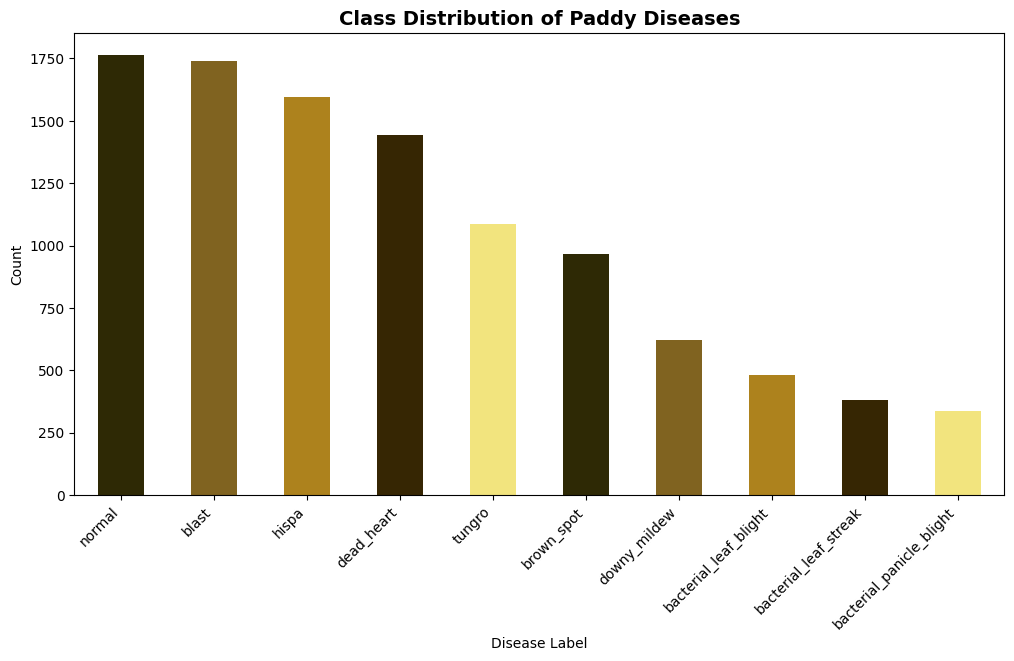

In [8]:
plt.figure(figsize=(12,6))
train['label'].value_counts().plot(kind='bar', color=colors)
plt.title("Class Distribution of Paddy Diseases", fontsize=14, fontweight="bold")
plt.xlabel("Disease Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:55%">2️⃣ Age Distribution per Variety</p>

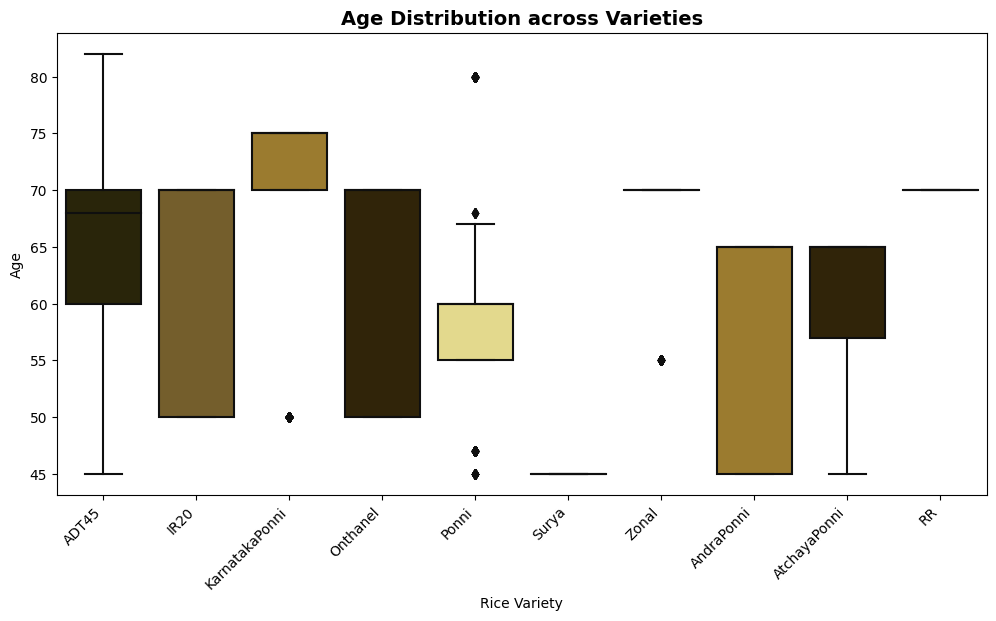

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train, x="variety", y="age", palette=colors)
plt.title("Age Distribution across Varieties", fontsize=14, fontweight="bold")
plt.xlabel("Rice Variety")
plt.ylabel("Age")
plt.xticks(rotation=45, ha="right")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:45%">3️⃣ Class vs Age</p>

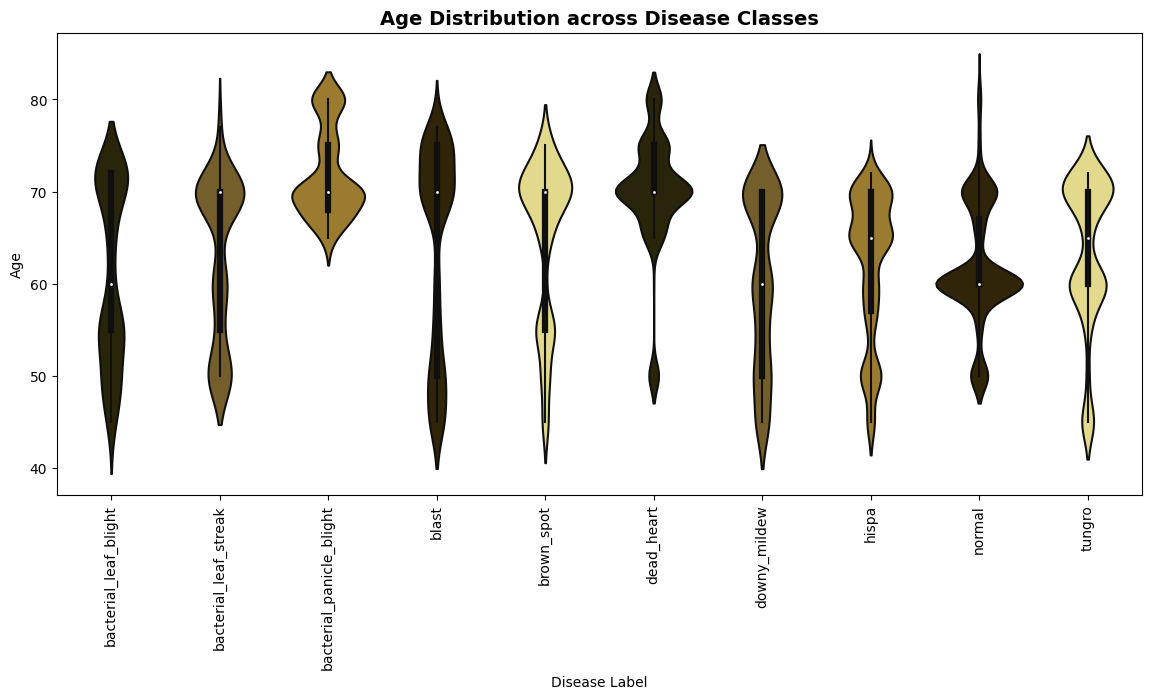

In [10]:
plt.figure(figsize=(14,6))
sns.violinplot(data=train, x="label", y="age", palette=colors)
plt.title("Age Distribution across Disease Classes", fontsize=14, fontweight="bold")
plt.xlabel("Disease Label")
plt.ylabel("Age")
plt.xticks(rotation=90)
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:45%">4️⃣ Correlation Heatmap</p>

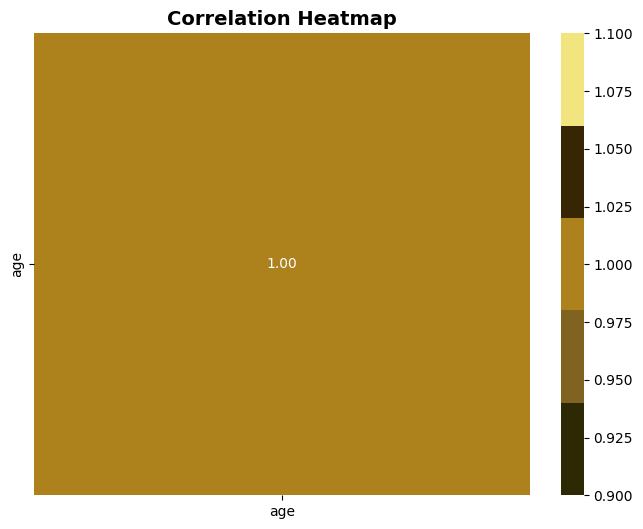

In [11]:
plt.figure(figsize=(8,6))
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=colors, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:80%">5️⃣ Stacked Bar Chart (Variety vs Label)</p>

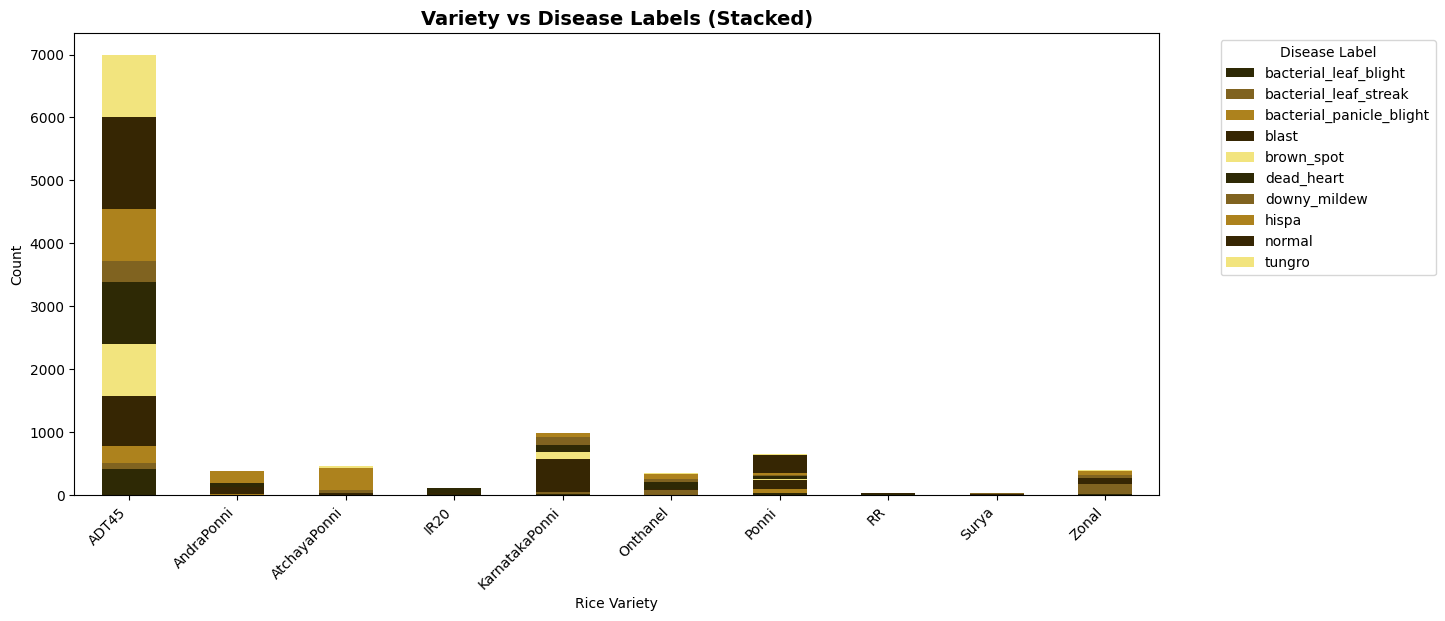

In [12]:
cross_tab = pd.crosstab(train['variety'], train['label'])

cross_tab.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6),
    color=colors   
)

plt.title("Variety vs Disease Labels (Stacked)", fontsize=14, fontweight="bold")
plt.xlabel("Rice Variety")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Disease Label", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


<div style="background-color: #f2e47e; padding: 20px; border-radius: 15px; border: 5px solid #2e2905; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Arial', sans-serif; font-size: 28px; color: #2e2905; font-weight: bold;">📊 Dataset Observations & Insights</p>
  
  <ul style="font-family: 'Arial', sans-serif; font-size: 14px; color: #2e2905; margin-left: 20px;">

<li><strong>🔹 Class Distribution:</strong>
      <ul>
        <li>Dataset has <strong>10 unique classes</strong> (including <i>normal</i>).</li>
        <li><i>Normal, Blast, Hispa</i> have the <strong>highest counts (1500+ each)</strong>.</li>
        <li><i>Bacterial Panicle Blight, Bacterial Leaf Streak, Bacterial Leaf Blight</i> are <strong>rare classes</strong> with less than 500 samples each.</li>
        <li>⚠️ Imbalance means models may perform better on frequent classes but struggle with rare ones.</li>
      </ul>
    </li>

 <li><strong>🔹 Correlation Heatmap:</strong>
      <ul>
        <li>Only one numerical feature (<i>age</i>) exists in the dataset.</li>
        <li>It shows a <strong>perfect correlation (1.0)</strong> with itself, as expected.</li>
        <li>No other numeric features are available for correlation analysis.</li>
      </ul>
    </li>

<li><strong>🔹 Age Distribution:</strong>
      <ul>
        <li>Crop ages mostly lie between <strong>40–80 days</strong>.</li>
        <li><i>Blast, Hispa, Tungro</i> appear across a wide age range.</li>
        <li><i>Bacterial Leaf Streak, Bacterial Panicle Blight</i> are more <strong>age-specific</strong>.</li>
        <li>👉 This makes <strong>age a useful feature</strong> for classifying diseases.</li>
      </ul>
    </li>

 <li><strong>🔹 Dataset Splits:</strong>
      <ul>
        <li><strong>Total Images:</strong> 10,407 across 10 classes.</li>
        <li><strong>Training:</strong> 8,326 images | <strong>Validation:</strong> 2,081 images.</li>
        <li>When loading <strong>test images</strong>, message showed <i>3,469 files belonging to 1 class</i>.</li>
        <li>⚠️ This is normal because test images are <strong>unlabeled</strong> and kept in a single folder.</li>
      </ul>
    </li>

  </ul>

  <p style="font-family: 'Georgia', serif; font-size: 16px; color: #2e2905; font-weight: bold; margin-top: 20px;">
    ✅ Key Takeaways:
  </p>
  <ul style="font-family: 'Arial', sans-serif; font-size: 14px; color: #2e2905; margin-left: 20px;">
    <li>Dataset is <strong>imbalanced</strong>, requiring handling of rare classes.</li>
    <li><strong>Age</strong> is an important feature with variation across classes.</li>
    <li>Training and validation sets are clearly defined and well-structured.</li>
    <li>Test set is separate, unlabeled, and prepared for evaluation.</li>
  </ul>
</div>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">🖼️ Sample Images from Each Class</p>

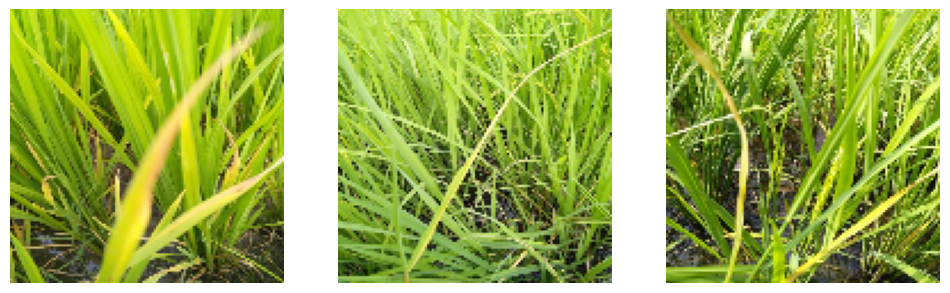

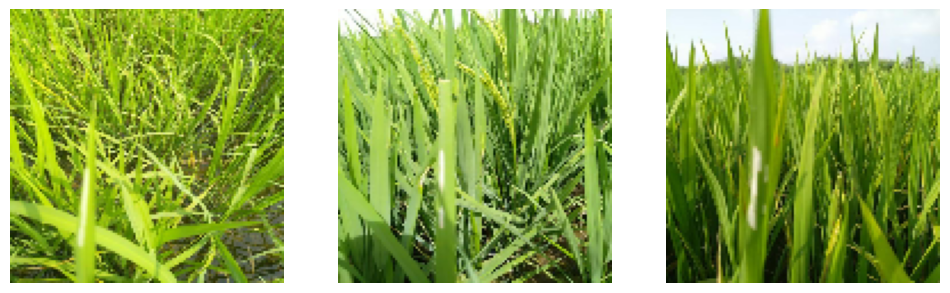

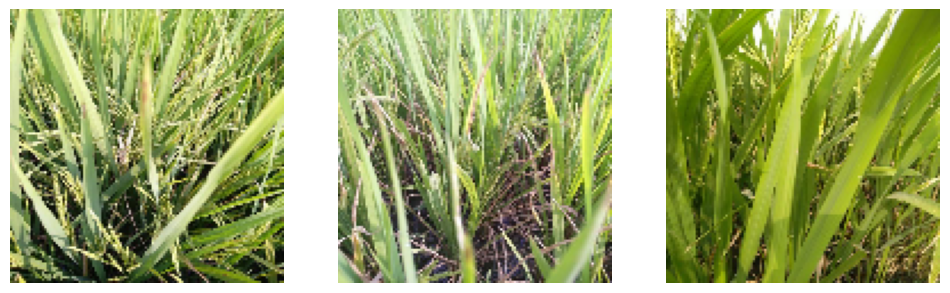

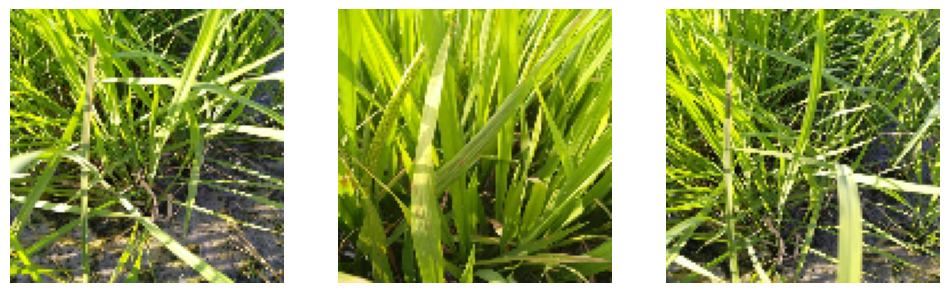

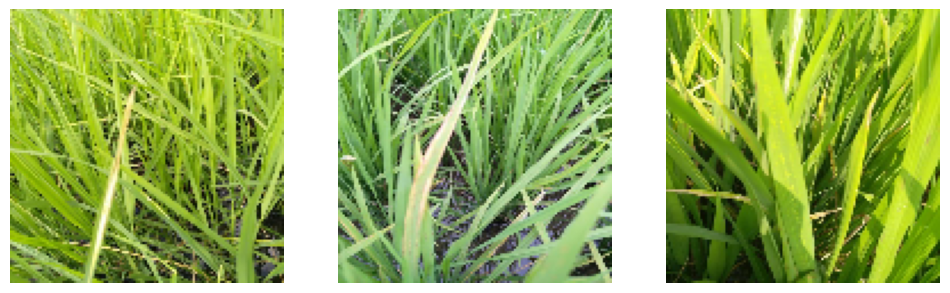

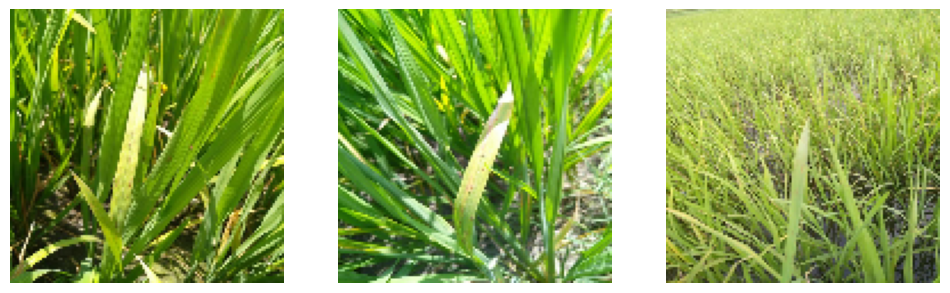

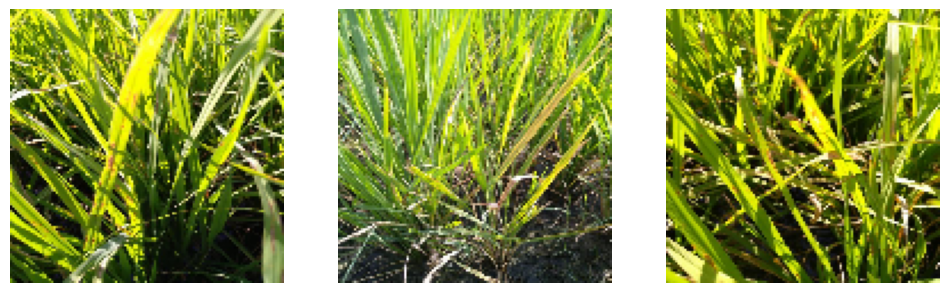

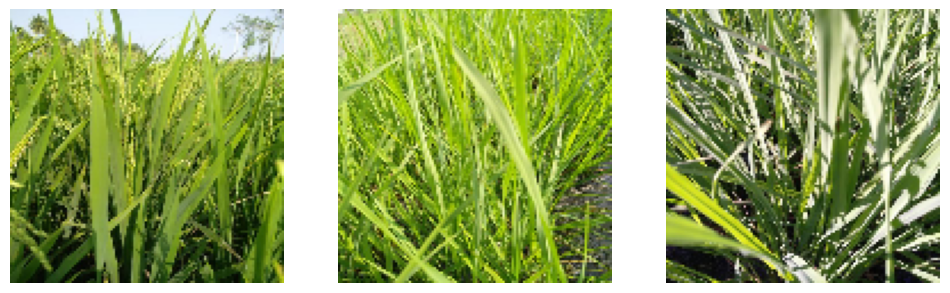

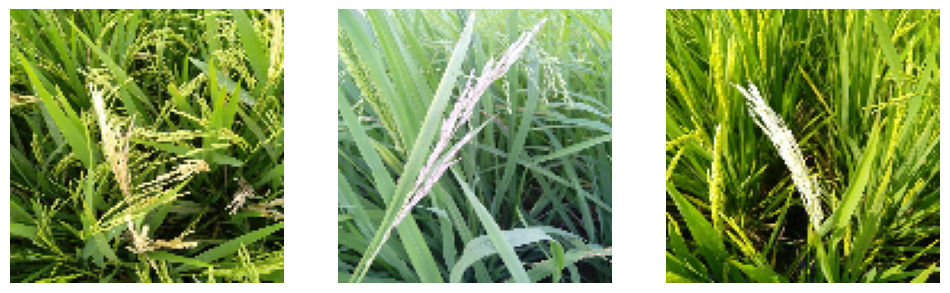

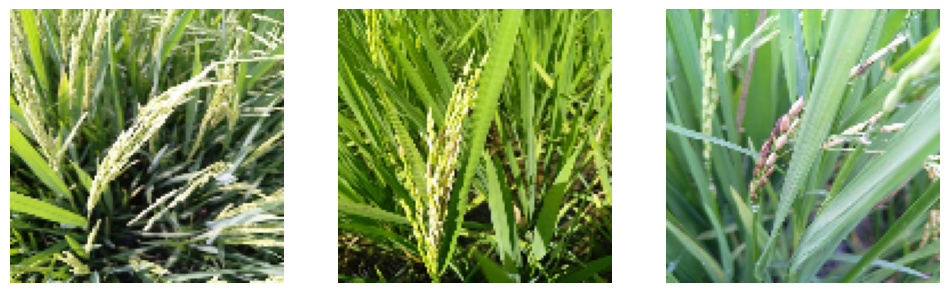

In [9]:
def show_classwise_samples(data_dir, classes, samples_per_class=3, img_size=(120, 120)):
    """
    Show 3 sample images for each class with styled bordered heading above.
    """
    for cls in classes:
        # Stylish bordered + background heading
        display(HTML(
            f"""
            <div style='
                text-align:center; 
                background-color:#f2e47e; 
                border:2px solid #2e2905; 
                border-radius:10px; 
                padding:8px; 
                margin:10px 0;'>
                <h2 style='color:#2e2905; font-weight:bold; margin:0;'>🌾 {cls}</h2>
            </div>
            """
        ))
        
        # Randomly select images
        img_names = random.sample(os.listdir(os.path.join(data_dir, cls)), samples_per_class)
        
        # Plot images
        plt.figure(figsize=(12, 4))
        for i, img_name in enumerate(img_names):
            img_path = os.path.join(data_dir, cls, img_name)
            
            # Read and resize
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)
            
            plt.subplot(1, samples_per_class, i+1)
            plt.imshow(img)
            plt.axis("off")
        
        plt.show()


# Example usage
data_dir = "/kaggle/input/paddy-disease-classification/train_images"
classes = os.listdir(data_dir)

show_classwise_samples(data_dir, classes, samples_per_class=3)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">🔹 Model Building + Training + Evaluation</p>

In [15]:
# AUTOTUNE
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:45%">🔹 EfficientNetB4 Model</p>

In [16]:
# 🔹 EfficientNetB4 Model Build + Training
efficientnet_base = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224,224,3))
efficientnet_base.trainable = False

model_effnet = Sequential([
    efficientnet_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_effnet.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history_effnet = model_effnet.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[es])

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/20


I0000 00:00:1759484279.949457      65 service.cc:148] XLA service 0x7ee1ac002930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759484279.950305      65 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1759484283.828760      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/261 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.0781 - loss: 2.3580   

I0000 00:00:1759484300.661194      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


261/261 ━━━━━━━━━━━━━━━━━━━━ 115s 253ms/step - accuracy: 0.3235 - loss: 1.9707 - val_accuracy: 0.5223 - val_loss: 1.4524
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.5112 - loss: 1.4662 - val_accuracy: 0.5920 - val_loss: 1.2538
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.5632 - loss: 1.3002 - val_accuracy: 0.6358 - val_loss: 1.1441
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6090 - loss: 1.1898 - val_accuracy: 0.6569 - val_loss: 1.0624
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6411 - loss: 1.1096 - val_accuracy: 0.6819 - val_loss: 0.9998
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6526 - loss: 1.0447 - val_accuracy: 0.7030 - val_loss: 0.9466
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6752 - loss: 0.9843 - val_accuracy: 0.7126 - val_loss: 0.8979
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6995 - loss: 0.9481 - val_accur

Class names: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8199 - loss: 0.5964

EfficientNet - Validation Loss: 0.6052, Accuracy: 0.8184



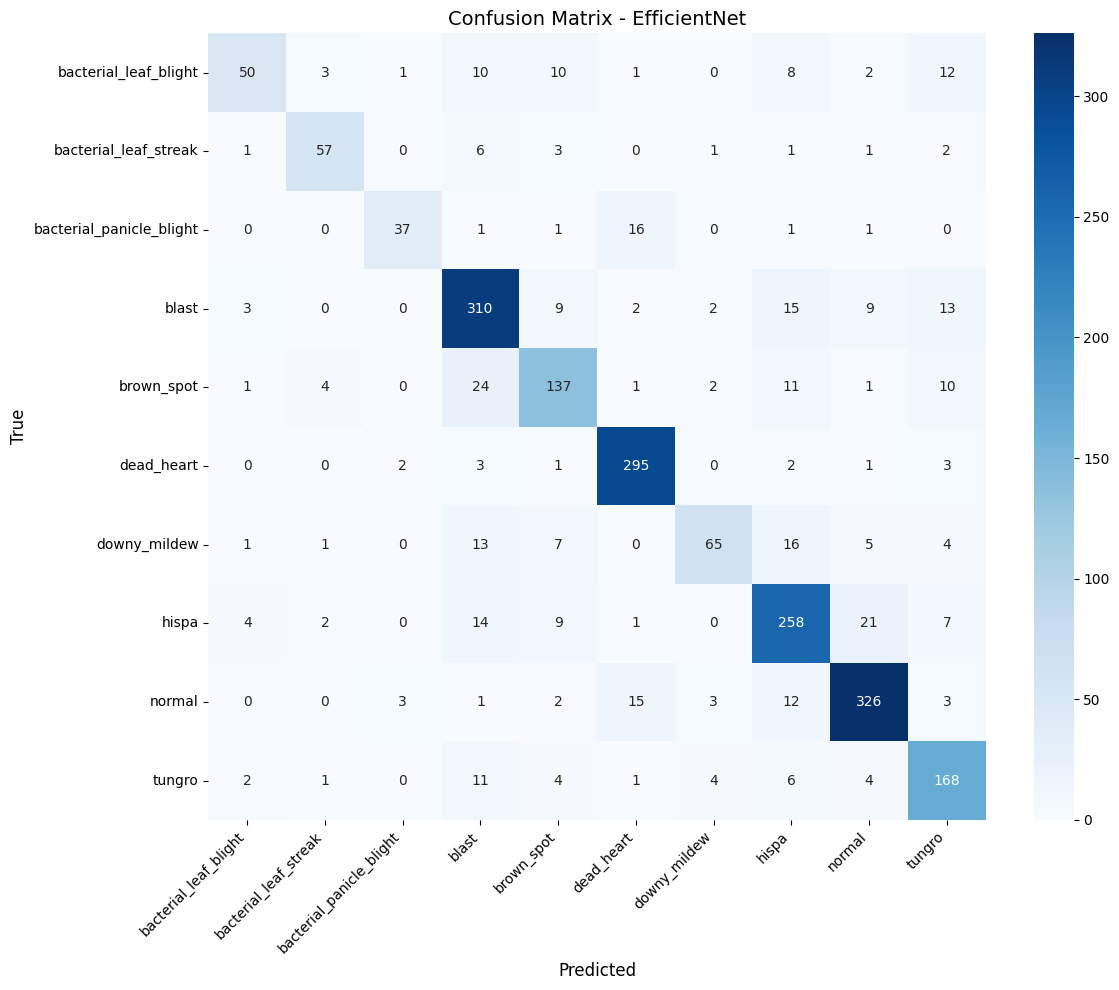

Classification Report - EfficientNet:

                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.81      0.52      0.63        97
   bacterial_leaf_streak       0.84      0.79      0.81        72
bacterial_panicle_blight       0.86      0.65      0.74        57
                   blast       0.79      0.85      0.82       363
              brown_spot       0.75      0.72      0.73       191
              dead_heart       0.89      0.96      0.92       307
            downy_mildew       0.84      0.58      0.69       112
                   hispa       0.78      0.82      0.80       316
                  normal       0.88      0.89      0.89       365
                  tungro       0.76      0.84      0.79       201

                accuracy                           0.82      2081
               macro avg       0.82      0.76      0.78      2081
            weighted avg       0.82      0.82      0.81      2081



In [17]:
try:
    class_names = validation_ds.class_names
except Exception:
    try:
        class_names = train_ds.class_names
    except Exception:
        # fallback: infer from train folder
        train_dir = "/kaggle/input/paddy-disease-classification/train_images"
        class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

print("Class names:", class_names)

# --- Evaluate model (loss & acc) ---
loss_effnet, acc_effnet = model_effnet.evaluate(val_ds, verbose=1)
print(f"\nEfficientNet - Validation Loss: {loss_effnet:.4f}, Accuracy: {acc_effnet:.4f}\n")

# --- Collect predictions and true labels from val dataset ---
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model_effnet.predict(images, verbose=0)
    y_true.extend(labels.numpy().tolist())                
    y_pred.extend(np.argmax(preds, axis=1).tolist())     

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap=colors,
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - EfficientNet", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Classification Report ---
print("Classification Report - EfficientNet:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

In [18]:
# 🔹 Save EfficientNetB4 Model
model_effnet.save("efficientnet_model.h5")

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:45%">🔹 Xception Model</p>

In [20]:
# 🔹 Xception Model Build + Training
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))
xception_base.trainable = False

model_xception = Sequential([
    xception_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_xception.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_xception = model_xception.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[es])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.1726 - loss: 6.6573 - val_accuracy: 0.3715 - val_loss: 1.9760
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.3202 - loss: 2.1644 - val_accuracy: 0.4325 - val_loss: 1.7116
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.4064 - loss: 1.7917 - val_accuracy: 0.4743 - val_loss: 1.5857
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.4526 - loss: 1.6389 - val_accuracy: 0.5060 - val_loss: 1.4963
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.4957 - loss: 1.5220 - val_accuracy: 0.5473 - val_loss: 1.4063
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.5141 - loss: 1.4244 - val_accuracy: 0.5714 - val_loss: 1.3357
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.5517 - loss: 1.3370 - val_accuracy: 0.5935 - val_loss: 1.2801
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7134 - loss: 0.8978

Xception - Validation Loss: 0.8824, Accuracy: 0.7203



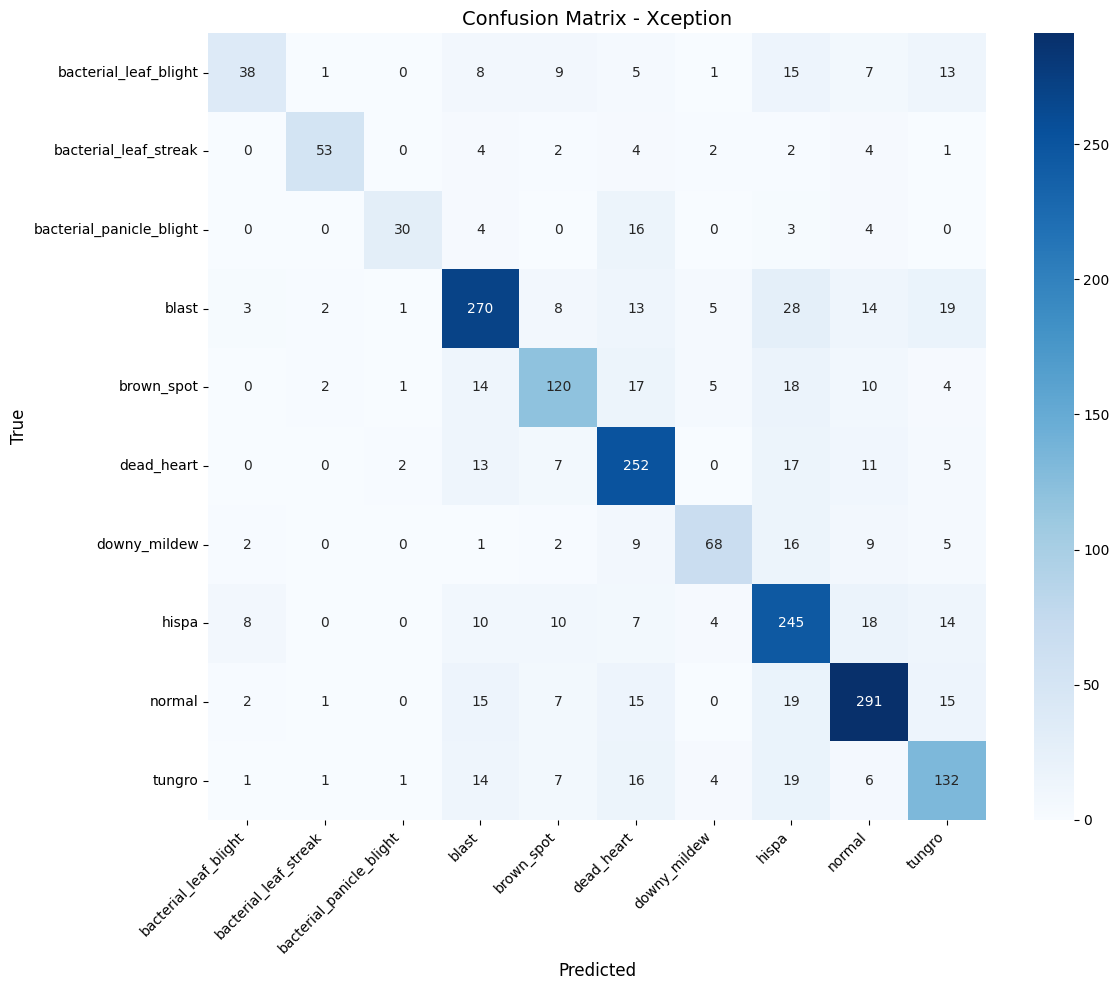

Classification Report - Xception:

                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.70      0.39      0.50        97
   bacterial_leaf_streak       0.88      0.74      0.80        72
bacterial_panicle_blight       0.86      0.53      0.65        57
                   blast       0.76      0.74      0.75       363
              brown_spot       0.70      0.63      0.66       191
              dead_heart       0.71      0.82      0.76       307
            downy_mildew       0.76      0.61      0.68       112
                   hispa       0.64      0.78      0.70       316
                  normal       0.78      0.80      0.79       365
                  tungro       0.63      0.66      0.65       201

                accuracy                           0.72      2081
               macro avg       0.74      0.67      0.69      2081
            weighted avg       0.73      0.72      0.72      2081



In [21]:
# --- Xception Evaluation ---
loss_xcep, acc_xcep = model_xception.evaluate(val_ds, verbose=1)
print(f"\nXception - Validation Loss: {loss_xcep:.4f}, Accuracy: {acc_xcep:.4f}\n")

# Predictions
y_true, y_pred = [], []
for images, labels in val_ds:
    preds = model_xception.predict(images, verbose=0)
    y_true.extend(labels.numpy().tolist())
    y_pred.extend(np.argmax(preds, axis=1).tolist())

y_true, y_pred = np.array(y_true), np.array(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap=colors,
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Xception", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report - Xception:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

In [22]:
# 🔹 Save Xception Model
model_xception.save("xception_model.h5")

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:45%">🔹 ResNet50 Model</p>

In [24]:
# 🔹 ResNet50 Model Build + Training
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
resnet_base.trainable = False

model_resnet = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_resnet.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_resnet = model_resnet.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[es])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.2715 - loss: 2.1396 - val_accuracy: 0.5550 - val_loss: 1.4579
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.5196 - loss: 1.4719 - val_accuracy: 0.6382 - val_loss: 1.2168
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.5908 - loss: 1.2484 - val_accuracy: 0.6819 - val_loss: 1.0628
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.6613 - loss: 1.0795 - val_accuracy: 0.7189 - val_loss: 0.9547
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.6984 - loss: 0.9594 - val_accuracy: 0.7338 - val_loss: 0.8801
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.7275 - loss: 0.8672 - val_accuracy: 0.7593 - val_loss: 0.8219
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.7580 - loss: 0.7903 - val_accuracy: 0.7761 - val_loss: 0.7575
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8713 - loss: 0.4272

ResNet50 - Validation Loss: 0.4283, Accuracy: 0.8751



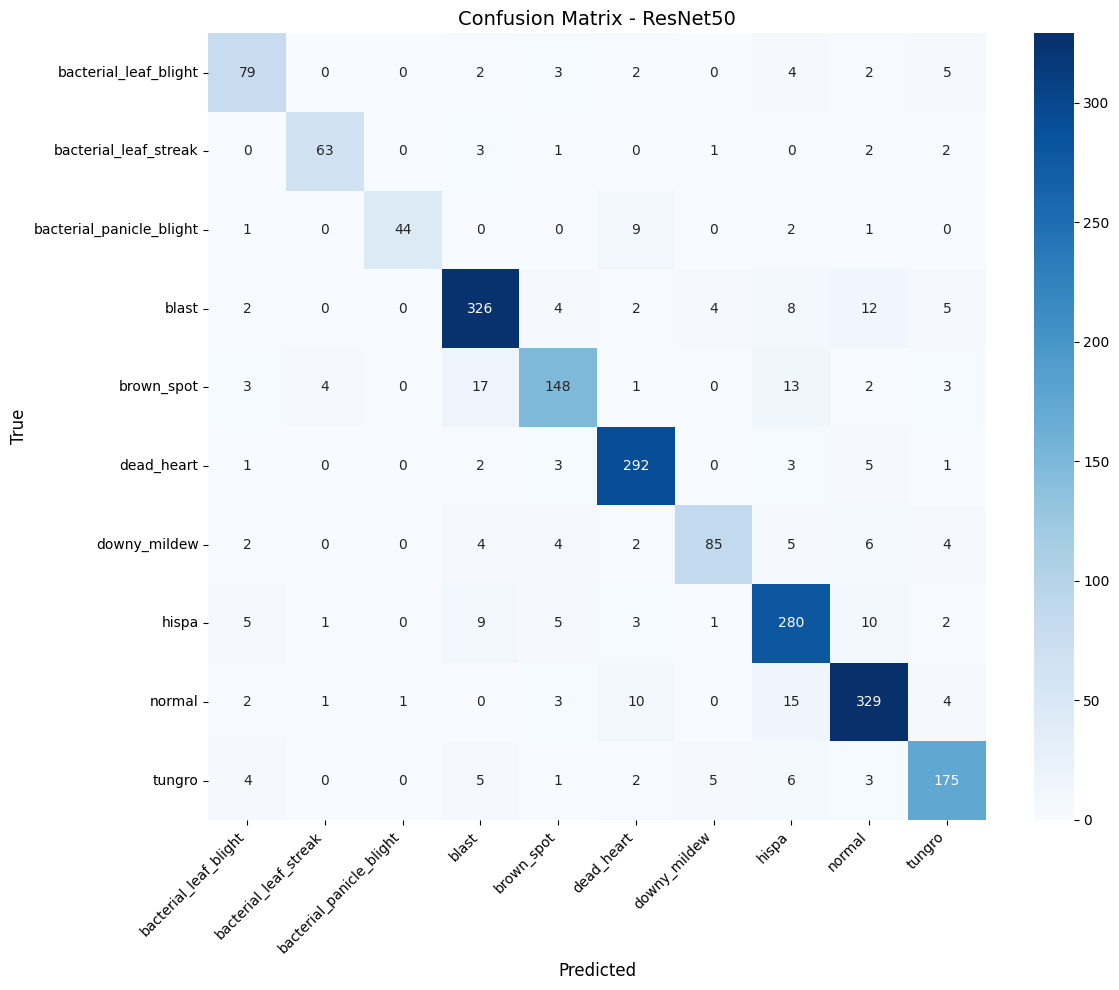

Classification Report - ResNet50:

                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.80      0.81      0.81        97
   bacterial_leaf_streak       0.91      0.88      0.89        72
bacterial_panicle_blight       0.98      0.77      0.86        57
                   blast       0.89      0.90      0.89       363
              brown_spot       0.86      0.77      0.82       191
              dead_heart       0.90      0.95      0.93       307
            downy_mildew       0.89      0.76      0.82       112
                   hispa       0.83      0.89      0.86       316
                  normal       0.88      0.90      0.89       365
                  tungro       0.87      0.87      0.87       201

                accuracy                           0.88      2081
               macro avg       0.88      0.85      0.86      2081
            weighted avg       0.88      0.88      0.87      2081



In [25]:
# --- ResNet Evaluation ---
loss_resnet, acc_resnet = model_resnet.evaluate(val_ds, verbose=1)
print(f"\nResNet50 - Validation Loss: {loss_resnet:.4f}, Accuracy: {acc_resnet:.4f}\n")

# Predictions
y_true, y_pred = [], []
for images, labels in val_ds:
    preds = model_resnet.predict(images, verbose=0)
    y_true.extend(labels.numpy().tolist())
    y_pred.extend(np.argmax(preds, axis=1).tolist())

y_true, y_pred = np.array(y_true), np.array(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap=colors,
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - ResNet50", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report - ResNet50:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

In [26]:
# 🔹 Save ResNet50 Model
model_resnet.save("resnet_model.h5")

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">🔹 Compare Models Performance</p>

- The following plots compare the **training and validation accuracy/loss** of all three models (EfficientNetB4, Xception, and ResNet50).  
- These curves provide insight into how well each model generalizes and help identify overfitting or underfitting trends.  

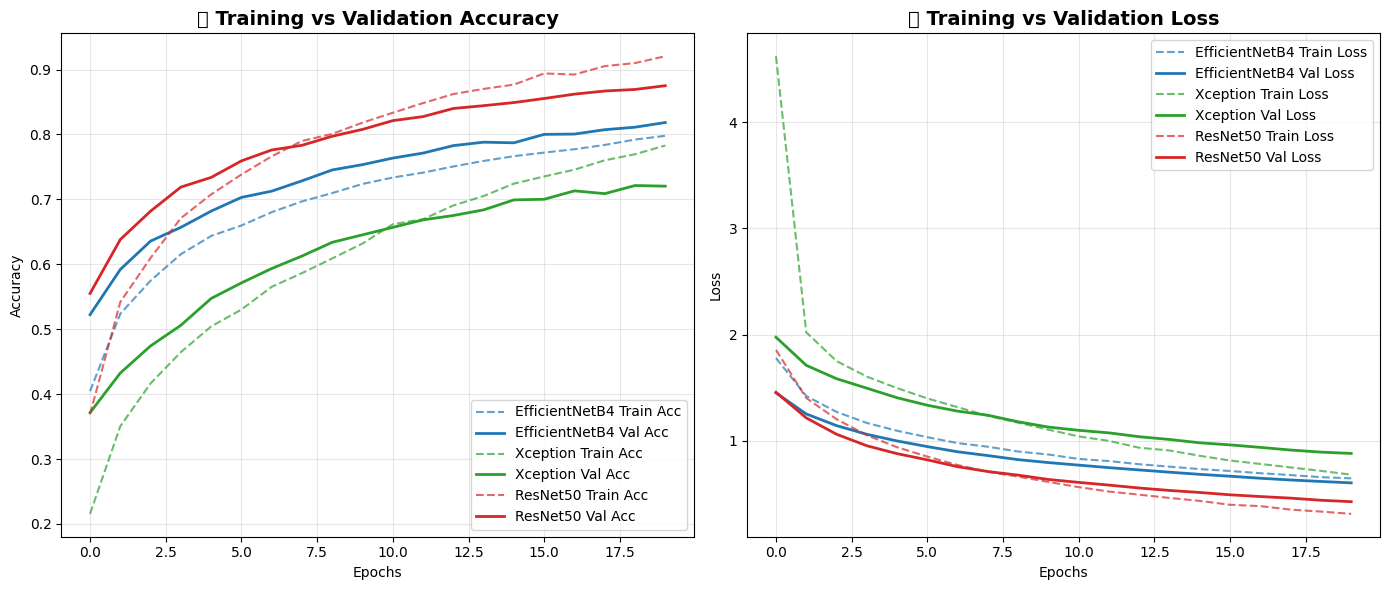

In [28]:
def plot_advanced_history(histories, model_names):
    colors = ["#2e2905", "#806320", "#ad821d"]  
    
    # Accuracy Plot
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    for (history, name, color) in zip(histories, model_names, colors):
        plt.plot(history.history['accuracy'], linestyle='--', color=color, alpha=0.7, label=f"{name} Train Acc")
        plt.plot(history.history['val_accuracy'], color=color, linewidth=2, label=f"{name} Val Acc")
    plt.title("Training vs Validation Accuracy", fontsize=14, fontweight='bold')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(alpha=0.3)
    plt.legend()
    
    # Loss Plot
    plt.subplot(1,2,2)
    for (history, name, color) in zip(histories, model_names, colors):
        plt.plot(history.history['loss'], linestyle='--', color=color, alpha=0.7, label=f"{name} Train Loss")
        plt.plot(history.history['val_loss'], color=color, linewidth=2, label=f"{name} Val Loss")
    plt.title("Training vs Validation Loss", fontsize=14, fontweight='bold')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call plotting function
histories = [history_effnet, history_xception, history_resnet]
model_names = ["EfficientNetB4", "Xception", "ResNet50"]

plot_advanced_history(histories, model_names)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">📊 Final Model Performance Summary </p>

- The table below compares **Training and Validation Accuracy/Loss** for all models.  
- The best model is ranked at the top based on **Validation Accuracy**.  

In [30]:
# Collect final results
results = {
    "Model": model_names,
    "Final Train Acc": [h.history['accuracy'][-1] for h in histories],
    "Final Val Acc": [h.history['val_accuracy'][-1] for h in histories],
    "Final Train Loss": [h.history['loss'][-1] for h in histories],
    "Final Val Loss": [h.history['val_loss'][-1] for h in histories]
}

results_df = pd.DataFrame(results)

# Sort by best validation accuracy
results_df.sort_values(by="Final Val Acc", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Add Rank column
results_df.index = results_df.index + 1
results_df.index.name = "Rank"

# Display with gradient
import IPython.display as display
display.display(
    results_df.style.background_gradient(cmap="YlGnBu").set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2e2105'),
                                     ('color', 'white'),
                                     ('font-weight', 'bold'),
                                     ('text-align', 'center')]}
    ]).set_properties(**{'text-align': 'center'})
)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #2e2905; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #f2e47e; padding: 20px; border-radius: 20px; border: 8px solid #2e2905; width:95%">🔹 Best Model Identification & Saving</p>

- Based on the comparison of **Validation Accuracy**, the best performing model is identified and saved for future use.  

In [31]:
# 🏆 Identify the Best Model
best_index = results_df["Final Val Acc"].astype(float).idxmax()
best_model_name = results_df.loc[best_index, "Model"]

print(f"🏆 Best Model Identified: {best_model_name}")

# ✅ Save the Best Model
if best_model_name == "EfficientNetB4":
    model_effnet.save("best_model.h5")
elif best_model_name == "Xception":
    model_xception.save("best_model.h5")
elif best_model_name == "ResNet50":
    model_resnet.save("best_model.h5")

print("✅ Best model saved as best_model.h5")

🏆 Best Model Identified: ResNet50
✅ Best model saved as best_model.h5


<div style="background-color: #f2e47e; padding: 20px; border-radius: 15px; border: 5px solid #2e2905; margin-top: 20px;">
  <p style="text-align: center; font-size: 28px; font-family: 'Arial', sans-serif; color: #2e2905; font-weight: bold;">📊 Final Insights & Conclusion</p>
  
  <ul style="font-family: 'Arial', sans-serif; font-size: 14px; color: #2e2905; margin-left: 20px;">

<li><strong>🔹 Model Comparison:</strong>
      <ul>
        <li><strong>ResNet50</strong> performed the best with <strong>87.5% validation accuracy</strong> and the lowest validation loss (0.42).</li>
        <li><strong>EfficientNet</strong> achieved <strong>81.8% accuracy</strong> but struggled with some rare classes.</li>
        <li><strong>Xception</strong> gave the lowest accuracy (<strong>72%</strong>) and had higher validation loss (0.88).</li>
      </ul>
    </li>

   <li><strong>🔹 Per-Class Performance:</strong>
      <ul>
        <li>ResNet50 showed <strong>balanced performance across all classes</strong>, including difficult ones like <i>bacterial panicle blight</i> and <i>downy mildew</i>.</li>
        <li>EfficientNet and Xception worked well for common classes but had <strong>lower recall on rare classes</strong>.</li>
        <li>All models performed very well on the <i>normal</i> class and high-support diseases like <i>blast</i> and <i>dead heart</i>.</li>
      </ul>
    </li>

<li><strong>🔹 Key Observations:</strong>
      <ul>
        <li>Class imbalance clearly impacted results — rare diseases were harder to predict accurately.</li>
        <li>ResNet50 handled this challenge better, achieving strong precision and recall across most categories.</li>
        <li>EfficientNet and Xception can still be useful but may require more <strong>data augmentation or class balancing</strong> to improve.</li>
      </ul>
    </li>

 <li><strong>🔹 Final Decision:</strong>
      <ul>
        <li>🏆 <strong>Best Model: ResNet50</strong> → Saved as <code>best_model.h5</code>.</li>
        <li>✅ All models are saved separately for future use and comparison.</li>
        <li>ResNet50 will be the primary choice for deployment due to its <strong>high accuracy, low loss, and balanced performance</strong>.</li>
      </ul>
    </li>
    
  </ul>

  <p style="font-family: 'Georgia', serif; font-size: 16px; color: #2e2905; font-weight: bold; margin-top: 20px;">
    ✅ Conclusion:
  </p>
  <p style="font-family: 'Arial', sans-serif; font-size: 14px; color: #2e2905; margin-left: 20px;">
    ResNet50 stands out as the most reliable model for <strong>Paddy Disease Classification</strong>.  
    With strong performance across all disease categories and the best validation accuracy, it proves to be a <strong>robust solution for smart agriculture</strong>.  
    However, handling class imbalance with techniques like oversampling, augmentation, or weighted loss can further boost performance, especially for rare diseases.
  </p>
</div>
